# Advertisement Click Prediction Model

This notebook analyzes the "Advertisement Click-on-Ad" dataset to predict whether a user will click on an advertisement.

Our goal is to build a regression model that predicts the likelihood of a user clicking on an ad based on the available features.

Dataset Information: 

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

Dataset: https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad

Example Solution: https://thecleverprogrammer.com/2021/01/24/click-through-rate-prediction-with-machine-learning/

Hugging Face: https://huggingface.co/spaces/alperugurcan/Click-Prediction

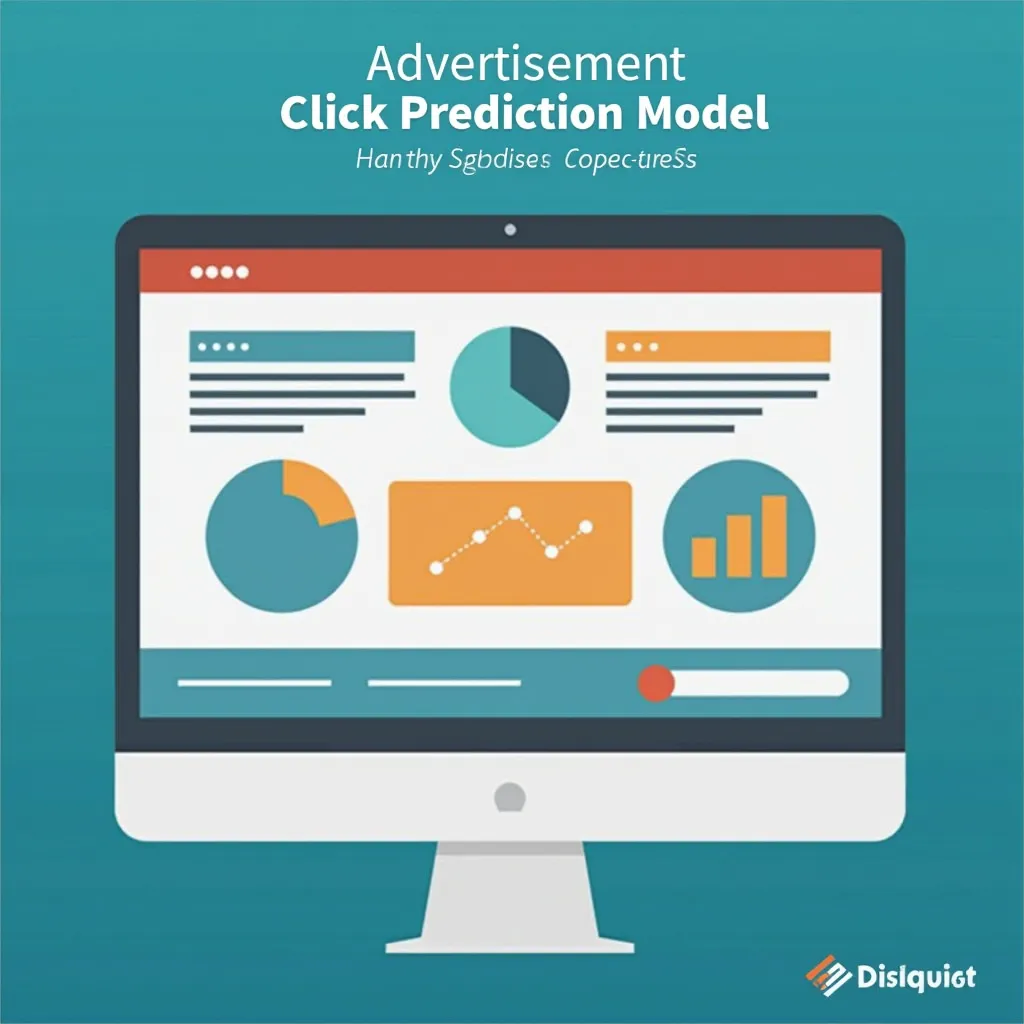

## 1. Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('advertising.csv')

In [2]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.tail()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe(include='all')


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


<Axes: title={'center': 'Distribution of Ad Clicks'}, xlabel='Clicked on Ad'>

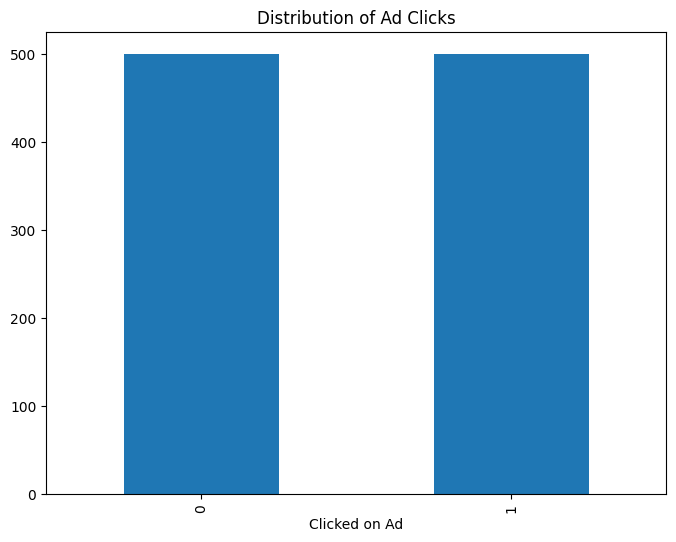

In [6]:
df['Clicked on Ad'].value_counts().plot(kind='bar', title='Distribution of Ad Clicks', figsize=(8, 6))

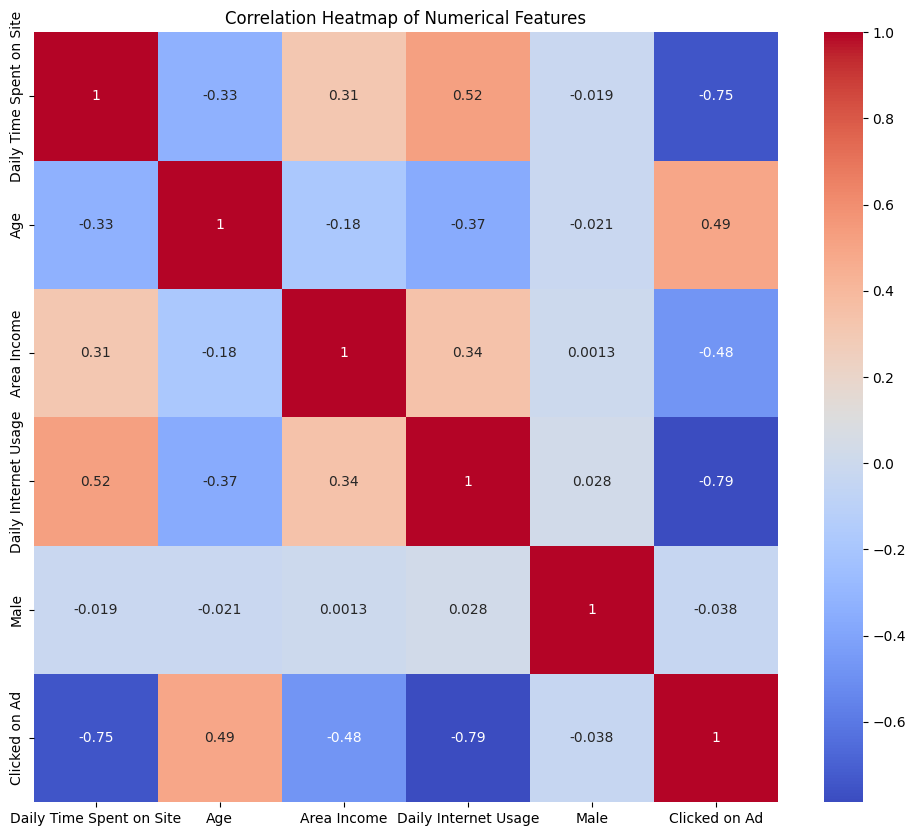

In [8]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [14]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [15]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [19]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 2. Data Preprocessing


In [33]:
df['Ad Topic Line'].value_counts()
del df['Ad Topic Line']

In [25]:
df['City'].value_counts()
del df['City']

In [22]:
df['Country'].value_counts()
del df['Country']

In [23]:
del df['Timestamp']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


In [27]:
df['Male'] = df['Male'].map({0: 'not_male', 1: 'male'})
df['Male'] = df['Male'].astype('category')

In [29]:
df = df.astype({col: 'int64' for col in df.select_dtypes('float64').columns})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   int64   
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   int64   
 3   Daily Internet Usage      1000 non-null   int64   
 4   Male                      1000 non-null   category
 5   Clicked on Ad             1000 non-null   int64   
dtypes: category(1), int64(5)
memory usage: 40.3 KB


In [37]:
# One-hot encode categorical variables
categorical_cols = ['Male']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Daily Time Spent on Site  1000 non-null   int64
 1   Age                       1000 non-null   int64
 2   Area Income               1000 non-null   int64
 3   Daily Internet Usage      1000 non-null   int64
 4   Clicked on Ad             1000 non-null   int64
 5   Male_not_male             1000 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 40.2 KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Male_not_male
0,68,35,61833,256,0,True
1,80,31,68441,193,0,False
2,69,26,59785,236,0,True
3,74,29,54806,245,0,False
4,68,35,73889,225,0,True


## 3. Model Building

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Özellikler ve hedef değişkeni ayırma
X = df_encoded.drop(['Clicked on Ad'], axis=1)
y = df_encoded[['Clicked on Ad']]

# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# y'yi 1 boyutlu diziye dönüştürme
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Modeli eğitme
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Değerlendirme
cv_scores = cross_val_score(model, X_scaled, np.ravel(y), cv=5)
y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Cross-validation accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
print(f"Test set accuracy: {test_score:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Modeli kaydetme
joblib.dump(model, 'click_predict_logistic_regression.joblib')

# Model yorumlama
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]}).sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 5 Feature Coefficients:")
print(coef_df.head())

# Sonuç
print("\nConclusion:")
print(f"The model achieved a cross-validation accuracy of {cv_scores.mean():.2f} and a test set accuracy of {test_score:.2f}.")
print("The most influential features are:", coef_df['Feature'].tolist()[:3])

Cross-validation accuracy: 0.97 (+/- 0.03)
Test set accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


Top 5 Feature Coefficients:
                    Feature  Coefficient
4             Male_not_male     0.747775
0  Daily Time Spent on Site    -0.192650
1                       Age     0.175594
3      Daily Internet Usage    -0.073485
2               Area Income    -0.000151

Conclusion:
The model achieved a cross-validation accuracy of 0.97 and a test set accuracy of 0.94.
The most influential features are: ['Male_not_male', 'Daily Time Spent on Site', 'Age']
